In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

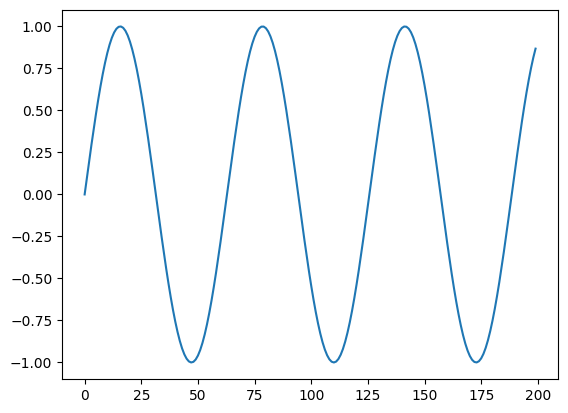

In [3]:
series = np.sin(0.1*np.arange(200))

plt.plot(series)
plt.show()

In [4]:
# zbuduj zbiór danych
# zobaczmy, czy możemy użyć T poprzednich wartości, aby przewidzieć następną wartość
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [5]:
# autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 135ms/step - loss: 1.8028 - val_loss: 0.1131
Epoch 2/80
3/3 [==============================] - 0s 31ms/step - loss: 0.5235 - val_loss: 0.8270
Epoch 3/80
3/3 [==============================] - 0s 33ms/step - loss: 0.8867 - val_loss: 0.3247
Epoch 4/80
3/3 [==============================] - 0s 37ms/step - loss: 0.1694 - val_loss: 0.0676
Epoch 5/80
3/3 [==============================] - 0s 35ms/step - loss: 0.2024 - val_loss: 0.2765
Epoch 6/80
3/3 [==============================] - 0s 25ms/step - loss: 0.3409 - val_loss: 0.1003
Epoch 7/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0751 - val_loss: 0.0317
Epoch 8/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0544 - val_loss: 0.1266
Epoch 9/80
3/3 [==============================] - 0s 34ms/step - loss: 0.1144 - val_loss: 0.0515
Epoch 10/80
3/3 [==============================] - 0s 34ms/step - loss: 0.0277 - val_loss: 0.0056
Epoch 11/80
3/3 [===========

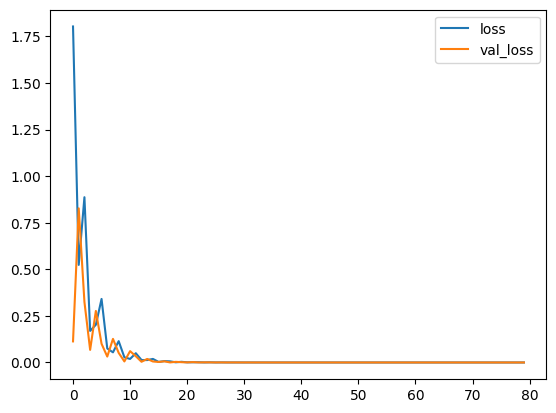

In [6]:
# Loss function
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [7]:
# Błędna prognoza oparta na prawdziwych celach

validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  validation_predictions.append(p)

1/1 [==============================] - 0s 27ms/step


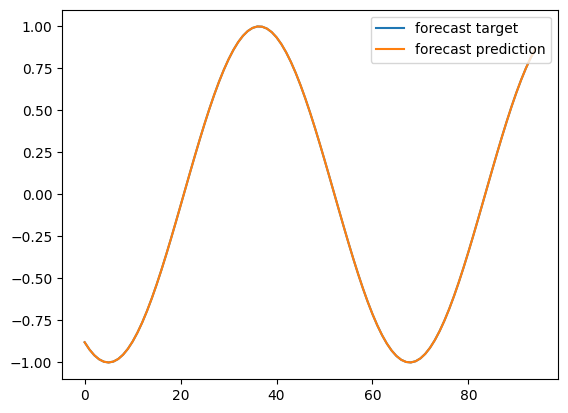

In [8]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [9]:
# Prognozuj przyszłe wartości (używaj wyłącznie własnych przewidywań do tworzenia przyszłych przewidywań)

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]


  validation_predictions.append(p)


  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 32ms/step


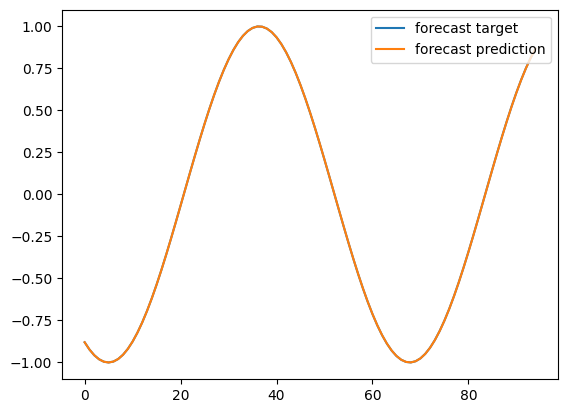

In [10]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()